# 5g Energy Prediction

## Initial Steps

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import random
import numpy as np
import torch

SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

print("Seeds set:", SEED)


Seeds set: 42


In [ ]:
# prompt: load file from gdrive

from google.colab import drive
drive.mount('/content/drive')

# Now you can access files in your Google Drive at '/content/drive/MyDrive'
# For example, to read a file named 'my_document.txt' in the root of your Drive:
path = '/content/drive/MyDrive/5gEnergyDS/5G_energy_consumption_dataset.csv'
df = pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


### Data loading

In [ ]:
df = pd.read_csv(path)
df.head()
df.describe()

,Energy,load,ESMODE,TXpower
count,92629.000000,92629.000000,92629.000000,92629.000000
mean,28.138997,0.244705,0.081361,6.765427
std,13.934645,0.234677,0.382317,0.309929
min,0.747384,0.000000,0.000000,5.381166
25%,18.236173,0.057370,0.000000,6.427504
50%,24.065770,0.165550,0.000000,6.875934
75%,35.724963,0.363766,0.000000,6.875934
max,100.000000,0.993957,4.000000,8.375336


In [ ]:
df.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


In [ ]:
# prompt: print the count of distinct values in column BS

print(df['BS'].nunique())
print(df['BS'].unique())

923
['B_0' 'B_1' 'B_2' 'B_3' 'B_4' 'B_5' 'B_6' 'B_7' 'B_8' 'B_9' 'B_10' 'B_11'
 'B_12' 'B_14' 'B_15' 'B_16' 'B_17' 'B_18' 'B_19' 'B_20' 'B_21' 'B_22'
 'B_23' 'B_24' 'B_25' 'B_26' 'B_27' 'B_28' 'B_29' 'B_30' 'B_31' 'B_32'
 'B_33' 'B_34' 'B_35' 'B_36' 'B_37' 'B_38' 'B_39' 'B_40' 'B_41' 'B_42'
 'B_43' 'B_44' 'B_45' 'B_46' 'B_47' 'B_48' 'B_49' 'B_50' 'B_51' 'B_52'
 'B_53' 'B_54' 'B_55' 'B_56' 'B_57' 'B_58' 'B_59' 'B_60' 'B_61' 'B_62'
 'B_63' 'B_64' 'B_65' 'B_66' 'B_67' 'B_68' 'B_69' 'B_70' 'B_71' 'B_72'
 'B_73' 'B_74' 'B_75' 'B_76' 'B_77' 'B_78' 'B_79' 'B_80' 'B_81' 'B_82'
 'B_83' 'B_84' 'B_85' 'B_86' 'B_87' 'B_88' 'B_89' 'B_90' 'B_91' 'B_92'
 'B_93' 'B_94' 'B_95' 'B_96' 'B_97' 'B_98' 'B_99' 'B_100' 'B_101' 'B_102'
 'B_103' 'B_104' 'B_105' 'B_106' 'B_107' 'B_108' 'B_109' 'B_110' 'B_111'
 'B_112' 'B_113' 'B_114' 'B_115' 'B_116' 'B_117' 'B_118' 'B_119' 'B_120'
 'B_121' 'B_122' 'B_123' 'B_124' 'B_125' 'B_126' 'B_127' 'B_128' 'B_129'
 'B_130' 'B_131' 'B_132' 'B_133' 'B_134' 'B_135' 'B_136' 'B_

### Preprocessing


In [ ]:
og_df = df.copy()
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d %H%M%S')


In [ ]:
df['hour']       = df['Time'].dt.hour
df['weekday']    = df['Time'].dt.dayofweek
df['is_weekend'] = df['weekday'].isin([5,6]).astype(int)

time_df = df.copy()

In [ ]:
bs_dummies = pd.get_dummies(df['BS'], prefix='BS')
df = pd.concat([df.drop(columns=['BS']), bs_dummies], axis=1)

In [ ]:
print(df.head())
print(df.info())

                 Time     Energy      load  ESMODE   TXpower  hour  weekday  \
0 2023-01-01 01:00:00  64.275037  0.487936     0.0  7.101719     1        6   
1 2023-01-01 02:00:00  55.904335  0.344468     0.0  7.101719     2        6   
2 2023-01-01 03:00:00  57.698057  0.193766     0.0  7.101719     3        6   
3 2023-01-01 04:00:00  55.156951  0.222383     0.0  7.101719     4        6   
4 2023-01-01 05:00:00  56.053812  0.175436     0.0  7.101719     5        6   

   is_weekend  BS_B_0  BS_B_1  ...  BS_B_990  BS_B_991  BS_B_992  BS_B_993  \
0           1    True   False  ...     False     False     False     False   
1           1    True   False  ...     False     False     False     False   
2           1    True   False  ...     False     False     False     False   
3           1    True   False  ...     False     False     False     False   
4           1    True   False  ...     False     False     False     False   

   BS_B_994  BS_B_995  BS_B_996  BS_B_997  BS_B_998  BS_

In [ ]:
# 4. Summary statistics table
summary = df[['Energy','load','TXpower']].describe().T
summary['missing_pct'] = df[['Energy','load','TXpower']].isna().mean().values * 100
display(summary)

,count,mean,std,min,25%,50%,75%,max,missing_pct
Energy,92629.0,28.138997,13.934645,0.747384,18.236173,24.065770,35.724963,100.000000,0.0
load,92629.0,0.244705,0.234677,0.000000,0.057370,0.165550,0.363766,0.993957,0.0
TXpower,92629.0,6.765427,0.309929,5.381166,6.427504,6.875934,6.875934,8.375336,0.0


### Initial visualisation

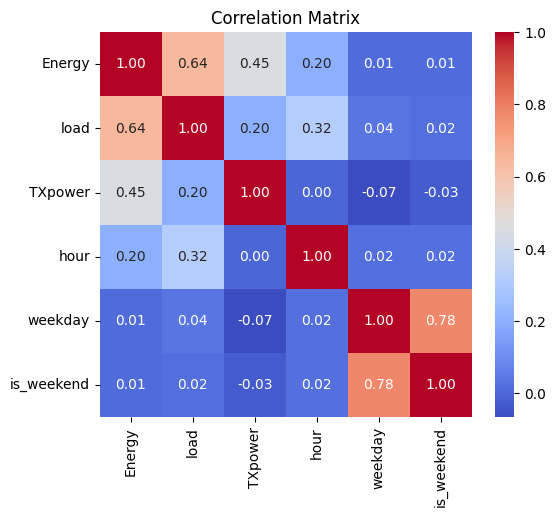

In [ ]:
# 5. Correlation heatmap
plt.figure(figsize=(6,5))
corr = df[['Energy','load','TXpower','hour','weekday','is_weekend']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

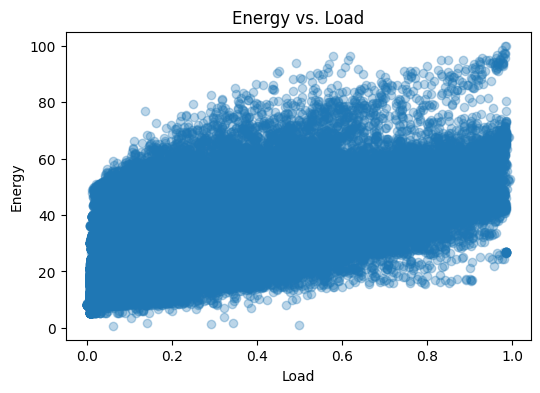

In [ ]:
# 6. Scatter: Energy vs. Load
plt.figure(figsize=(6,4))
plt.scatter(df['load'], df['Energy'], alpha=0.3)
plt.xlabel('Load')
plt.ylabel('Energy')
plt.title('Energy vs. Load')
plt.show()

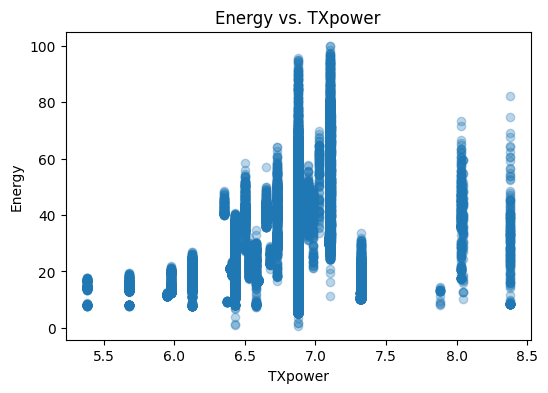

In [ ]:
# 7. Scatter: Energy vs. TXpower
plt.figure(figsize=(6,4))
plt.scatter(df['TXpower'], df['Energy'], alpha=0.3)
plt.xlabel('TXpower')
plt.ylabel('Energy')
plt.title('Energy vs. TXpower')
plt.show()

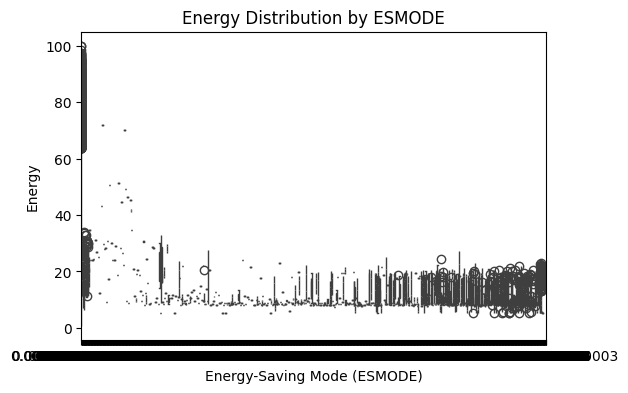

In [ ]:
# 8. Boxplot: Energy by ESMODE
plt.figure(figsize=(6,4))
sns.boxplot(x='ESMODE', y='Energy', data=df)
plt.xlabel('Energy-Saving Mode (ESMODE)')
plt.title('Energy Distribution by ESMODE')
plt.show()

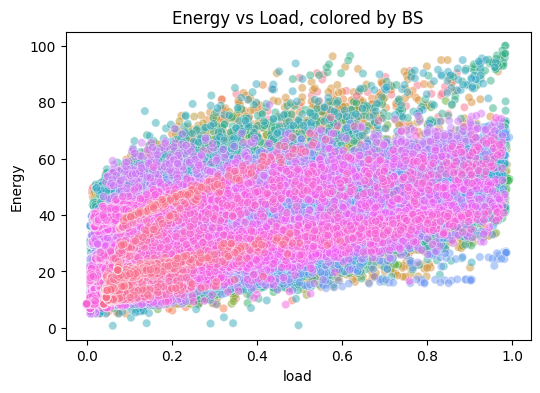

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='load', y='Energy', hue='BS', data=time_df, alpha=0.5, legend=False)
plt.title('Energy vs Load, colored by BS')
plt.show()

In [ ]:
df.head()

,Time,Energy,load,ESMODE,TXpower,hour,weekday,is_weekend,BS_B_0,BS_B_1,...,BS_B_990,BS_B_991,BS_B_992,BS_B_993,BS_B_994,BS_B_995,BS_B_996,BS_B_997,BS_B_998,BS_B_999
0,2023-01-01 01:00:00,64.275037,0.487936,0.0,7.101719,1,6,1,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2023-01-01 02:00:00,55.904335,0.344468,0.0,7.101719,2,6,1,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2023-01-01 03:00:00,57.698057,0.193766,0.0,7.101719,3,6,1,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2023-01-01 04:00:00,55.156951,0.222383,0.0,7.101719,4,6,1,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2023-01-01 05:00:00,56.053812,0.175436,0.0,7.101719,5,6,1,True,False,...,False,False,False,False,False,False,False,False,False,False


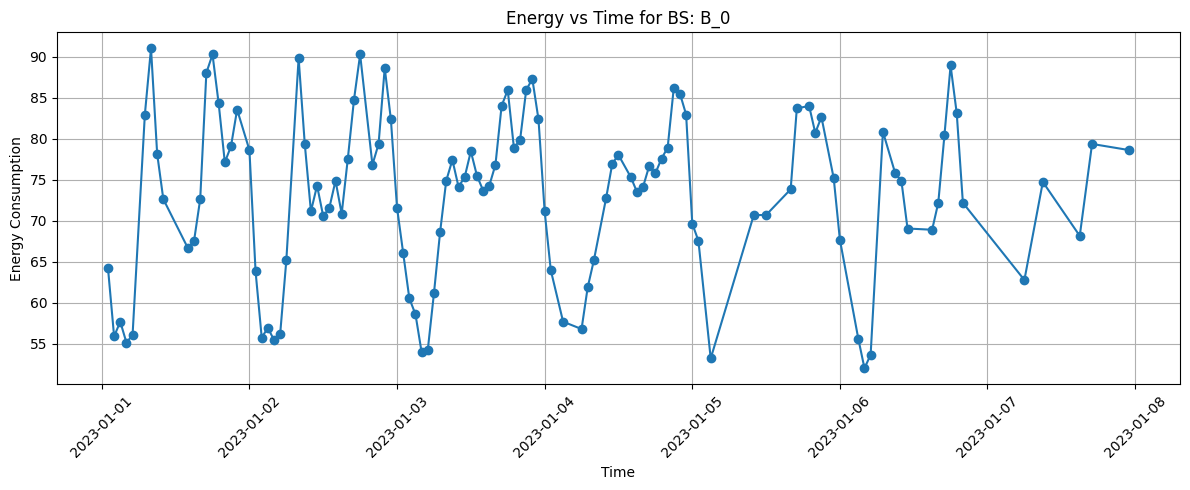

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(path)
# Ensure 'Time' is a datetime object
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d %H%M%S')

# Choose a BSID, e.g., 'B_0'
bs_id = 'B_0'
df_bs = df[df['BS'] == bs_id].sort_values('Time')

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df_bs['Time'], df_bs['Energy'], marker='o', linestyle='-')
plt.title(f'Energy vs Time for BS: {bs_id}')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-20-61b92c820944>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


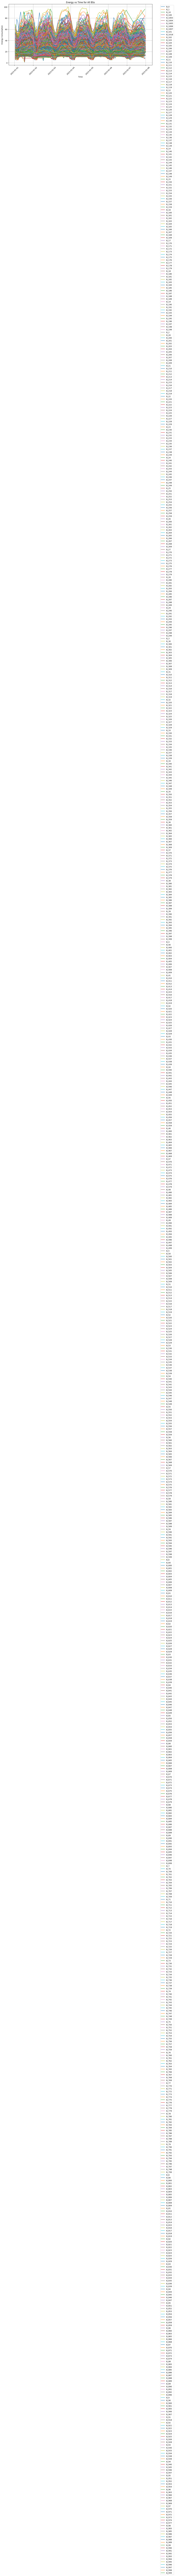

In [ ]:
# Sort by time
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d %H%M%S')
df_sorted = df.sort_values(['BS', 'Time'])

# Plot
plt.figure(figsize=(14, 6))
for bs_id, group in df_sorted.groupby('BS'):
    plt.plot(group['Time'], group['Energy'], label=bs_id)

plt.title('Energy vs Time for All BSs')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


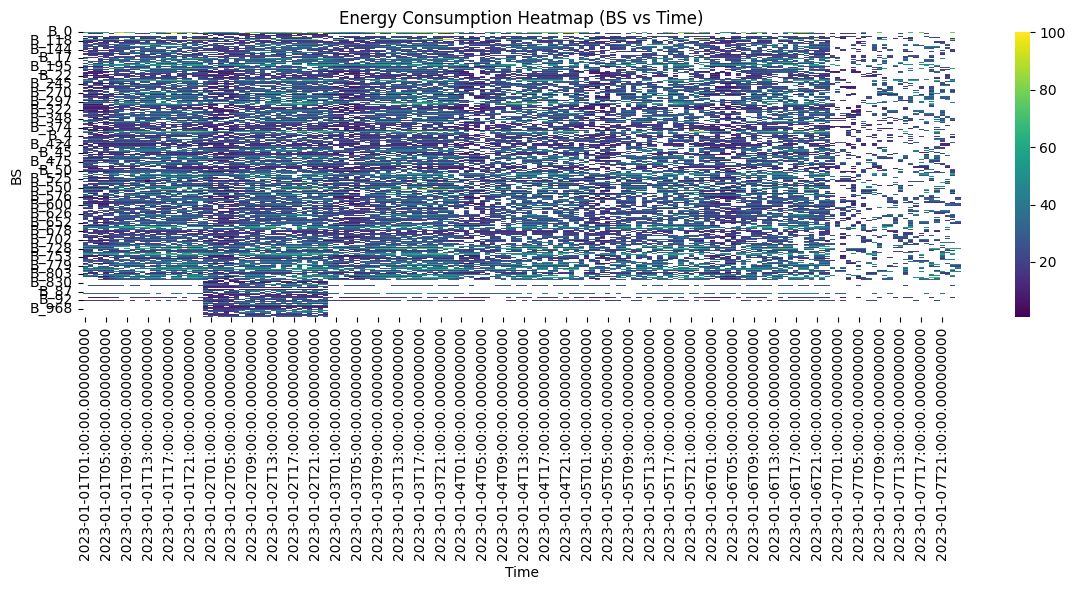

In [ ]:
pivot_df = df.pivot(index='Time', columns='BS', values='Energy')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df.T, cmap='viridis')
plt.title('Energy Consumption Heatmap (BS vs Time)')
plt.xlabel('Time')
plt.ylabel('BS')
plt.tight_layout()
plt.show()

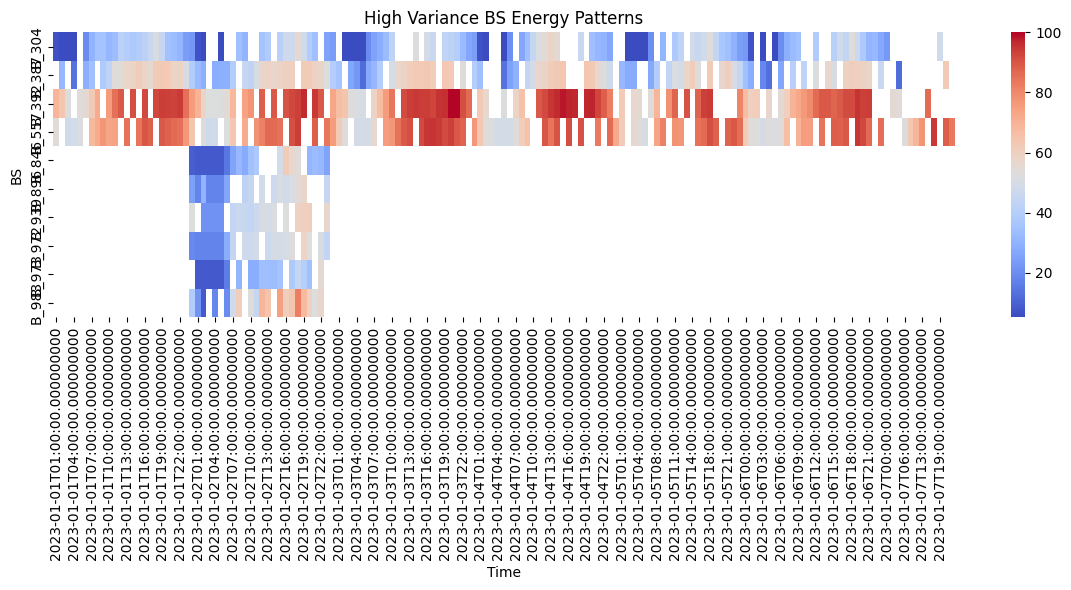

In [ ]:
# Calculate variance per BS
bs_var = df.groupby('BS')['Energy'].var().sort_values(ascending=False)
top_bs = bs_var.head(10).index
df_top = df[df['BS'].isin(top_bs)]

# Plot as before
pivot_df = df_top.pivot(index='BS', columns='Time', values='Energy')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap='coolwarm')
plt.title('High Variance BS Energy Patterns')
plt.xlabel('Time')
plt.ylabel('BS')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Basic Modelling

In [ ]:
df=pd.read_csv(path)

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d %H%M%S')

In [ ]:
df['hour']       = df['Time'].dt.hour
df['weekday']    = df['Time'].dt.dayofweek
df['is_weekend'] = df['weekday'].isin([5,6]).astype(int)

time_df = df.copy()

In [ ]:
bs_dummies = pd.get_dummies(df['BS'], prefix='BS')
df = pd.concat([df.drop(columns=['BS']), bs_dummies], axis=1)

In [ ]:
FEATURE_COLS = ['load', 'ESMODE', 'TXpower', 'hour', 'weekday', 'is_weekend'] + list(bs_dummies.columns)
TARGET_COL = 'Energy'

In [ ]:
X = df[FEATURE_COLS]
y = df[TARGET_COL]


In [ ]:
def mape_loss(pred, target, eps=1e-6):
    return (torch.abs((target - pred) / (target + eps))).mean() * 100

In [ ]:
df = df.sort_values('Time')
split_idx = int(len(df) * 0.7)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (64840, 929), Test size: (27789, 929)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

lr = LinearRegression()
print("Linear Regression")
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))


Linear Regression
MAE: 7.5353723910607115
RMSE: 98.42881863875682


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error # Import MAPE
import numpy as np # Often needed for handling potential issues like division by zero if any actuals are 0

lr = LinearRegression()
print("Linear Regression")
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Calculate RMSE from MSE
mape = mean_absolute_percentage_error(y_test, y_pred) # Calculate MAPE

print("MAE:", mae)
print("RMSE:", rmse) # Print the actual RMSE
print("MAPE:", mape * 100, "%") # MAPE is usually expressed as a percentage

# --- Optional: Handling cases where y_test might contain zeros ---
# scikit-learn's mean_absolute_percentage_error handles division by zero gracefully by default
# (it excludes samples where actual is zero from the average, or you can define behavior).
# However, if you were calculating it manually, you'd need to be careful:
#
# For example, a more robust manual calculation (if not using sklearn's function):
#
# def manual_mape(y_true, y_pred):
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     # Avoid division by zero
#     # Option 1: Remove entries where y_true is 0
#     mask = y_true != 0
#     if not np.any(mask): # All true values are zero
#         return np.nan # Or some other indicator like np.inf or 0 depending on preference
#     return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
#
# print("Manual MAPE (excluding zeros):", manual_mape(y_test, y_pred), "%")
#
# Note: The way sklearn handles zeros in MAPE calculation might be slightly different
# depending on the version or if there's a specific parameter for it.
# For most energy consumption data, actual values are unlikely to be exactly zero,
# but it's good practice to be aware of this potential issue with MAPE.

Linear Regression
MAE: 7.5353723910607115
RMSE: 9.921129907362207
MAPE: 35.0124600675965 %


In [ ]:
lin_mape=mape*100

In [ ]:
# ✅ Install if needed (XGBoost)
#!pip install xgboost

# ✅ Imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder

# ✅ Your own train_df and test_df should already be loaded here.
# Example structure:
# Columns needed: ['load', 'TXpower', 'hour', 'is_weekend', 'BSID', 'Energy']

# 🔁 Encode BSID
le = LabelEncoder()
train_df['BSID_encoded'] = le.fit_transform(train_df['BSID'])
test_df['BSID_encoded'] = le.transform(test_df['BSID'])

# ✅ Select features and target
feature_cols = ['load', 'TXpower', 'hour', 'is_weekend', 'BSID_encoded']
X_train = train_df[feature_cols]
y_train = train_df['Energy']
X_test = test_df[feature_cols]
y_test = test_df['Energy']

# ✅ Train and evaluate Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr) * 100

# ✅ Train and evaluate Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100

# ✅ Train and evaluate XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100

# ✅ Show results
baseline_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAPE (%)': [mape_lr, mape_rf, mape_xgb]
})

print("📊 Baseline Model Performance:")
print(baseline_results)


NameError: name 'train_df' is not defined

## Chen et al.’s “Energy Fingerprint Is All You Need” architecture
[paper](https://arxiv.org/pdf/2406.16929)

### Notes:
BSID Embedding

Instead of treating BS as one-hot or dummy variables, they map each base station to a learned dense vector (like word embeddings).

This lets the model learn latent traits of each BS (e.g. baseline consumption, efficiency slope, etc.).

Masked Training

During training, a fraction (e.g. 30%) of BSIDs are randomly replaced with an “unknown” token.

This forces the model to learn from contextual features (like load, power, time) instead of overfitting to specific stations.

At test time, real BSIDs are used again—if the model has seen them, great; if not, it defaults to “unknown,” which it was trained to handle.

Adaptive Reweighting Layer (ARL)

This is a mini attention module that learns to scale each input feature (including embeddings) depending on the input.

So if TXpower is more useful for BS A and load is more useful for BS B, the model learns to focus accordingly.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

### Loss & Metrics


In [ ]:
def mape_loss(pred, target, eps=1e-6):
    return (torch.abs((target - pred) / (target + eps))).mean() * 100

### Data Preparation

In [ ]:
df = pd.read_csv(path)
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d %H%M%S')
df['hour']       = df['Time'].dt.hour
df['weekday']    = df['Time'].dt.dayofweek
df['is_weekend'] = df['weekday'].isin([5,6]).astype(int)


In [ ]:

# create a unique integer for each BS type
df['BSID'] = df['BS'].astype('category').cat.codes
num_bs = df['BSID'].nunique()

In [ ]:
df = df.sort_values('Time')
train_df, test_df = train_test_split(df, test_size=0.3, shuffle=False)


In [ ]:
class EnergyDataset(Dataset):
    def __init__(self, df, mask_prob=0.3, is_train=True):
        self.df = df.reset_index(drop=True)
        self.mask_prob = mask_prob
        self.is_train = is_train

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.loc[idx]
        x_num = torch.tensor([row.load, row.TXpower, row.hour, row.is_weekend],
                         dtype=torch.float)
        bsid_val = row.BSID
    # masked training
        if self.is_train and np.random.rand() < self.mask_prob:
            bsid_val = num_bs
        bsid = torch.tensor(bsid_val, dtype=torch.long)   # <<-- force long
        y    = torch.tensor(row.Energy, dtype=torch.float)
        return {'x_num': x_num, 'bsid': bsid, 'y': y}



In [ ]:
train_ds = EnergyDataset(train_df, mask_prob=0.3, is_train=True)
test_ds  = EnergyDataset(test_df,  mask_prob=0.0, is_train=False)

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=128, shuffle=False)


### Model Components
BS Embedding

In [ ]:
class BS_Embedding(nn.Module):
    def __init__(self, num_bs, emb_dim=64):
        super().__init__()
        # +1 for the “unknown” token
        self.embedding = nn.Embedding(num_bs+1, emb_dim)

    def forward(self, bsid):
        return self.embedding(bsid)

Adaptive Re-weighting Layer (ARL)

In [ ]:
class ARL(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        hidden = in_dim // 2
        self.fc1 = nn.Linear(in_dim, hidden)
        self.fc2 = nn.Linear(hidden, in_dim)

    def forward(self, x):
        # x: (batch, in_dim)
        gates = torch.sigmoid(self.fc2(F.relu(self.fc1(x))))
        return x * gates  # feature-wise reweighting


Full Regression Model

In [ ]:
class EnergyRegressor(nn.Module):
    def __init__(self, num_bs, emb_dim=64, arl_hidden=None):
        super().__init__()
        self.bs_emb = BS_Embedding(num_bs, emb_dim)
        # total input dim = numeric (4) + emb_dim
        total_dim = 4 + emb_dim

        self.arl = ARL(total_dim)
        # MLP head: 128 → 64 → 1
        self.fc1 = nn.Linear(total_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x_num, bsid):
        emb = self.bs_emb(bsid)
        x = torch.cat([x_num, emb], dim=-1)
        x = self.arl(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x).squeeze(-1)


### Training Loop

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = EnergyRegressor(num_bs, emb_dim=64).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
Vals = []

for epoch in range(1, 21):
    model.train()
    train_losses = []
    print(f"Epoch {epoch:02d}: Training")
    for batch in train_loader:
        x_num = batch['x_num'].to(device)
        bsid  = batch['bsid'].to(device)
        y     = batch['y'].to(device)

        pred = model(x_num, bsid)
        loss = mape_loss(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    # eval
    model.eval()
    val_losses = []
    print(f"Epoch {epoch:02d}: Validation")
    with torch.no_grad():
        for batch in test_loader:
            x_num = batch['x_num'].to(device)
            bsid  = batch['bsid'].to(device).long()
            y     = batch['y'].to(device)
            pred = model(x_num, bsid)
            val_losses.append(mape_loss(pred, y).item())

    print(f"Epoch {epoch:02d} — Train MAPE: {np.mean(train_losses):.2f}%, "
          f"Val MAPE: {np.mean(val_losses):.2f}%")
    Vals.append((np.mean(train_losses),np.mean(val_losses)))

Epoch 01: Training
Epoch 01: Validation
Epoch 01 — Train MAPE: 31.66%, Val MAPE: 13.71%
Epoch 02: Training
Epoch 02: Validation
Epoch 02 — Train MAPE: 16.20%, Val MAPE: 9.04%
Epoch 03: Training
Epoch 03: Validation
Epoch 03 — Train MAPE: 14.04%, Val MAPE: 8.00%
Epoch 04: Training
Epoch 04: Validation
Epoch 04 — Train MAPE: 13.32%, Val MAPE: 7.38%
Epoch 05: Training
Epoch 05: Validation
Epoch 05 — Train MAPE: 12.98%, Val MAPE: 7.06%
Epoch 06: Training
Epoch 06: Validation
Epoch 06 — Train MAPE: 12.58%, Val MAPE: 6.72%
Epoch 07: Training
Epoch 07: Validation
Epoch 07 — Train MAPE: 12.27%, Val MAPE: 6.54%
Epoch 08: Training
Epoch 08: Validation
Epoch 08 — Train MAPE: 12.19%, Val MAPE: 6.55%
Epoch 09: Training
Epoch 09: Validation
Epoch 09 — Train MAPE: 12.03%, Val MAPE: 6.73%
Epoch 10: Training
Epoch 10: Validation
Epoch 10 — Train MAPE: 12.05%, Val MAPE: 6.15%
Epoch 11: Training
Epoch 11: Validation
Epoch 11 — Train MAPE: 11.72%, Val MAPE: 6.27%
Epoch 12: Training
Epoch 12: Validation
Ep

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = EnergyRegressor(num_bs, emb_dim=64).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
Vals = []

best_val_mape = float('inf')
patience = 5
patience_counter = 0

for epoch in range(1, 101):  # Go beyond 20 if needed
    model.train()
    train_losses = []
    print(f"Epoch {epoch:02d}: Training")
    for batch in train_loader:
        x_num = batch['x_num'].to(device)
        bsid  = batch['bsid'].to(device)
        y     = batch['y'].to(device)

        pred = model(x_num, bsid)
        loss = mape_loss(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    # Evaluation
    model.eval()
    val_losses = []
    print(f"Epoch {epoch:02d}: Validation")
    with torch.no_grad():
        for batch in test_loader:
            x_num = batch['x_num'].to(device)
            bsid  = batch['bsid'].to(device).long()
            y     = batch['y'].to(device)
            pred = model(x_num, bsid)
            val_losses.append(mape_loss(pred, y).item())

    train_mape = np.mean(train_losses)
    val_mape = np.mean(val_losses)
    print(f"Epoch {epoch:02d} — Train MAPE: {train_mape:.2f}%, Val MAPE: {val_mape:.2f}%")

    # Save if best
    if val_mape < best_val_mape:
        best_val_mape = val_mape
        torch.save(model.state_dict(), 'energy_model_best.pt')
        print(f"💾 Saved new best model at epoch {epoch} (Val MAPE: {val_mape:.2f}%)")
        patience_counter = 0  # reset counter
    else:
        patience_counter += 1
        print(f"⏳ Patience: {patience_counter}/{patience}")

    # Stop if no improvement for N epochs
    if patience_counter >= patience:
        print("🔥 Early stopping triggered.")
        break

    Vals.append((train_mape, val_mape))


Epoch 01: Training
Epoch 01: Validation
Epoch 01 — Train MAPE: 31.60%, Val MAPE: 14.42%
💾 Saved new best model at epoch 1 (Val MAPE: 14.42%)
Epoch 02: Training
Epoch 02: Validation
Epoch 02 — Train MAPE: 16.07%, Val MAPE: 8.93%
💾 Saved new best model at epoch 2 (Val MAPE: 8.93%)
Epoch 03: Training
Epoch 03: Validation
Epoch 03 — Train MAPE: 13.88%, Val MAPE: 7.64%
💾 Saved new best model at epoch 3 (Val MAPE: 7.64%)
Epoch 04: Training
Epoch 04: Validation
Epoch 04 — Train MAPE: 13.00%, Val MAPE: 7.15%
💾 Saved new best model at epoch 4 (Val MAPE: 7.15%)
Epoch 05: Training
Epoch 05: Validation
Epoch 05 — Train MAPE: 12.63%, Val MAPE: 6.64%
💾 Saved new best model at epoch 5 (Val MAPE: 6.64%)
Epoch 06: Training
Epoch 06: Validation
Epoch 06 — Train MAPE: 12.33%, Val MAPE: 6.42%
💾 Saved new best model at epoch 6 (Val MAPE: 6.42%)
Epoch 07: Training
Epoch 07: Validation
Epoch 07 — Train MAPE: 12.24%, Val MAPE: 6.77%
⏳ Patience: 1/5
Epoch 08: Training
Epoch 08: Validation
Epoch 08 — Train MAPE

In [ ]:
model = EnergyRegressor(num_bs, emb_dim=64)
model.load_state_dict(torch.load('energy_model_best.pt'))
model.eval()


EnergyRegressor(
  (bs_emb): BS_Embedding(
    (embedding): Embedding(924, 64)
  )
  (arl): ARL(
    (fc1): Linear(in_features=68, out_features=34, bias=True)
    (fc2): Linear(in_features=34, out_features=68, bias=True)
  )
  (fc1): Linear(in_features=68, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)

### Ablation Model

In [ ]:
class AblationEnergyRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        total_dim = 4  # Only numeric features: load, TXpower, hour, is_weekend

        # Optional: keep ARL or remove it too
        self.arl = ARL(total_dim)

        self.fc1 = nn.Linear(total_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x_num, bsid=None):  # bsid ignored
        x = self.arl(x_num)  # you can comment this to skip ARL too
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x).squeeze(-1)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AblationEnergyRegressor().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
Vals = []

best_val_mape = float('inf')
patience = 5
patience_counter = 0

for epoch in range(1, 101):  # Go beyond 20 if needed
    model.train()
    train_losses = []
    print(f"Epoch {epoch:02d}: Training")
    for batch in train_loader:
        x_num = batch['x_num'].to(device)
        bsid  = batch['bsid'].to(device)
        y     = batch['y'].to(device)

        pred = model(x_num, bsid)
        loss = mape_loss(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    # Evaluation
    model.eval()
    val_losses = []
    print(f"Epoch {epoch:02d}: Validation")
    with torch.no_grad():
        for batch in test_loader:
            x_num = batch['x_num'].to(device)
            bsid  = batch['bsid'].to(device).long()
            y     = batch['y'].to(device)
            pred = model(x_num, bsid)
            val_losses.append(mape_loss(pred, y).item())

    train_mape = np.mean(train_losses)
    val_mape = np.mean(val_losses)
    print(f"Epoch {epoch:02d} — Train MAPE: {train_mape:.2f}%, Val MAPE: {val_mape:.2f}%")

    # Save if best
    if val_mape < best_val_mape:
        best_val_mape = val_mape
        torch.save(model.state_dict(), 'ablation_energy_model_best.pt')
        print(f"💾 Saved new best model at epoch {epoch} (Val MAPE: {val_mape:.2f}%)")
        patience_counter = 0  # reset counter
    else:
        patience_counter += 1
        print(f"⏳ Patience: {patience_counter}/{patience}")

    # Stop if no improvement for N epochs
    if patience_counter >= patience:
        print("🔥 Early stopping triggered.")
        break

    Vals.append((train_mape, val_mape))


Epoch 01: Training
Epoch 01: Validation
Epoch 01 — Train MAPE: 36.90%, Val MAPE: 28.14%
💾 Saved new best model at epoch 1 (Val MAPE: 28.14%)
Epoch 02: Training
Epoch 02: Validation
Epoch 02 — Train MAPE: 26.34%, Val MAPE: 23.00%
💾 Saved new best model at epoch 2 (Val MAPE: 23.00%)
Epoch 03: Training
Epoch 03: Validation
Epoch 03 — Train MAPE: 25.31%, Val MAPE: 22.69%
💾 Saved new best model at epoch 3 (Val MAPE: 22.69%)
Epoch 04: Training
Epoch 04: Validation
Epoch 04 — Train MAPE: 25.15%, Val MAPE: 22.62%
💾 Saved new best model at epoch 4 (Val MAPE: 22.62%)
Epoch 05: Training
Epoch 05: Validation
Epoch 05 — Train MAPE: 25.09%, Val MAPE: 22.59%
💾 Saved new best model at epoch 5 (Val MAPE: 22.59%)
Epoch 06: Training
Epoch 06: Validation
Epoch 06 — Train MAPE: 24.95%, Val MAPE: 22.71%
⏳ Patience: 1/5
Epoch 07: Training
Epoch 07: Validation
Epoch 07 — Train MAPE: 24.84%, Val MAPE: 22.53%
💾 Saved new best model at epoch 7 (Val MAPE: 22.53%)
Epoch 08: Training
Epoch 08: Validation
Epoch 08 —

**Rapid initial learning**

Epoch 1 → 2 your Train MAPE plummets from 31.6 % to 16.1 %, and Val MAPE from 14.0 % to 8.8 %. i.e, model immediately picked up on the main load-to-energy relationships.

**Continued improvement & convergence**

Over epochs 2–15, both curves steadily improve:

Train MAPE falls from ~16 % to ~11.7 %

Val MAPE falls from ~8.8 % to ~5.8 %

After epoch ~15, the gains shrink: by epoch 20 at Train 11.3 % and Val 5.63 %—a plateau.


**Validation error below training error**

You’re seeing Val MAPE < Train MAPE. That’s because during training you’re randomly masking 30 % of BSIDs (making the task harder), but at validation you’re not masking. So the network actually “sees” a cleaner (easier) problem at validation time.

**No overfitting yet**

The gap between train and val errors is stable (≈5–6 pp) and not widening. That suggests the model is generalizing well, not memorizing.

In [ ]:
train_losses

[18.82377815246582,
 18.293296813964844,
 20.304012298583984,
 21.78433609008789,
 17.90188980102539,
 19.400718688964844,
 19.818384170532227,
 21.655773162841797,
 19.87213706970215,
 18.14004135131836,
 19.697677612304688,
 18.774276733398438,
 19.613977432250977,
 21.445003509521484,
 19.685171127319336,
 20.516693115234375,
 17.35162353515625,
 18.25728988647461,
 18.4926815032959,
 18.732858657836914,
 18.936662673950195,
 21.33095932006836,
 16.965896606445312,
 18.713748931884766,
 20.7703914642334,
 17.934349060058594,
 17.90713119506836,
 22.247928619384766,
 17.6865177154541,
 19.959815979003906,
 18.11749839782715,
 19.743289947509766,
 20.187368392944336,
 21.677988052368164,
 19.072195053100586,
 19.545289993286133,
 20.332073211669922,
 19.151350021362305,
 15.020939826965332,
 21.595340728759766,
 20.071882247924805,
 21.557706832885742,
 18.243318557739258,
 19.46515464782715,
 16.408823013305664,
 19.050268173217773,
 19.935380935668945,
 22.02082633972168,
 15.733899

### Multiple training and Comparison


In [ ]:
# ─── A. Helper: Train & Eval function ─────────────────────────────────────────
def run_training(mask_prob, model_kwargs, optimizer_kwargs, epochs=10):
    # rebuild datasets & loaders with new mask_prob
    train_ds = EnergyDataset(train_df, mask_prob=mask_prob, is_train=True)
    test_ds  = EnergyDataset(test_df,  mask_prob=0.0,     is_train=False)
    train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
    test_loader  = DataLoader(test_ds,  batch_size=128, shuffle=False)

    # rebuild model
    model = EnergyRegressor(**model_kwargs).to(device)
    optimizer = torch.optim.Adam(model.parameters(), **optimizer_kwargs)

    best_val = float('inf')
    for epoch in range(1, epochs+1):
        # train
        model.train()
        for b in train_loader:
            x_num = b['x_num'].to(device)
            bsid  = b['bsid'].to(device).long()
            y     = b['y'].to(device)
            pred  = model(x_num, bsid)
            loss  = mape_loss(pred, y)
            optimizer.zero_grad(); loss.backward(); optimizer.step()

        # validate
        model.eval()
        val_losses = []
        with torch.no_grad():
            for b in test_loader:
                x_num = b['x_num'].to(device)
                bsid  = b['bsid'].to(device).long()
                y     = b['y'].to(device)
                val_losses.append(mape_loss(model(x_num, bsid), y).item())
        val_mape = np.mean(val_losses)
        print(f"mask={mask_prob:.2f} | Epoch {epoch:02d} Val MAPE: {val_mape:.2f}%")

        best_val = min(best_val, val_mape)
    return best_val


In [ ]:
# ─── B. Experiment: try mask_prob ∈ [0.1, 0.3, 0.5] ──────────────────────────
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_kwargs     = dict(num_bs=num_bs, emb_dim=64)
optimizer_kwargs = dict(lr=1e-3)

results = {}
for mp in [0.1, 0.3, 0.5]:
    best = run_training(mask_prob=mp,
                        model_kwargs=model_kwargs,
                        optimizer_kwargs=optimizer_kwargs,
                        epochs=5)
    results[mp] = best

print("→ Best Val MAPE by mask_prob:", results)


mask=0.10 | Epoch 01 Val MAPE: 12.69%
mask=0.10 | Epoch 02 Val MAPE: 8.17%
mask=0.10 | Epoch 03 Val MAPE: 7.39%
mask=0.10 | Epoch 04 Val MAPE: 6.75%
mask=0.10 | Epoch 05 Val MAPE: 6.58%
mask=0.30 | Epoch 01 Val MAPE: 14.38%
mask=0.30 | Epoch 02 Val MAPE: 9.35%
mask=0.30 | Epoch 03 Val MAPE: 8.23%
mask=0.30 | Epoch 04 Val MAPE: 7.62%
mask=0.30 | Epoch 05 Val MAPE: 7.25%
mask=0.50 | Epoch 01 Val MAPE: 16.47%
mask=0.50 | Epoch 02 Val MAPE: 10.52%
mask=0.50 | Epoch 03 Val MAPE: 8.52%
mask=0.50 | Epoch 04 Val MAPE: 7.88%
mask=0.50 | Epoch 05 Val MAPE: 7.23%
→ Best Val MAPE by mask_prob: {0.1: np.float64(6.576344140079043), 0.3: np.float64(7.253299323790664), 0.5: np.float64(7.23246540498296)}


In [ ]:
Vals

[(np.float64(36.899233048719296), np.float64(28.138360994671462)),
 (np.float64(26.341705927952273), np.float64(22.998602079688958)),
 (np.float64(25.311388820821247), np.float64(22.694788114740213)),
 (np.float64(25.14680692759256), np.float64(22.62367786617454)),
 (np.float64(25.087123426930205), np.float64(22.5852483959373)),
 (np.float64(24.94936728618554), np.float64(22.711232780316553)),
 (np.float64(24.840168010553665), np.float64(22.531499040236167)),
 (np.float64(24.760472310835556), np.float64(22.51495469819515)),
 (np.float64(24.69768302586422), np.float64(22.326075755128073)),
 (np.float64(24.577234565388757), np.float64(22.26874961328069)),
 (np.float64(24.523607129881366), np.float64(22.248292905475022)),
 (np.float64(24.409092566435625), np.float64(22.94769071876456)),
 (np.float64(24.381672330626838), np.float64(22.02050182360028)),
 (np.float64(24.260162654477934), np.float64(22.029123914351157)),
 (np.float64(24.154359354775334), np.float64(21.968218890898818)),
 (np.

## Result


In [ ]:
mape = [lin_mape,17.7,5.74]

<ipython-input-68-4cb6e3e9db27>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mape_values, palette='viridis')


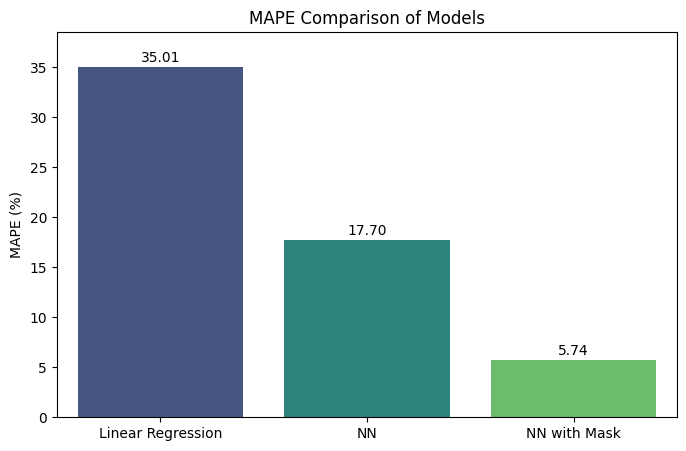

In [ ]:
# prompt: plot mapr in a barchart

models = ['Linear Regression', 'NN', 'NN with Mask']
mape_values = [lin_mape, 17.7, 5.74] # Using lin_mape from previous code, and the provided values

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=mape_values, palette='viridis')
plt.ylabel('MAPE (%)')
plt.title('MAPE Comparison of Models')
plt.ylim(0, max(mape_values) * 1.1) # Set y-limit slightly above max value for better visualization

# Add text labels for the values on top of bars
for index, value in enumerate(mape_values):
    plt.text(index, value + 0.5, f"{value:.2f}", ha='center')

plt.show()
